# title: "TP7 Régression linéaire pas à pas"
## author: "Louai KASSA BAGHDOUCHE"
## date: "22/12/2020"

## Partie 1 
Importer le data frame cars du package base. Ce data frame contient des colonnes nommées « speed » et « dist ». Tracer le nuage de points  correspondant. Nous allons calculer et tracer la  droite des  moindres carrés pas à pas :
On appellera x le vecteur colonne « speed » et  y « dist »
 (y= distance nécéssaire pour s’arrêter en fonction de x=vitesse du véhicule, données de 1920)
On demande dans un premier temps de ne pas utiliser les fonctions mean(), sd() et cov(), pour

* Calculer la moyenne de x, de y, ainsi que leurs écarts-types  
* Calculer la covariance de (x,y)

Vérifier à l’aide de mean(), sd() et cov(), expliquer les écarts éventuels

* En déduire les coefficients a et b  de la droite des moindres carrés données par y=ax+b
Vérifier le résultat obtenus à l’aide de la fonction lm(). On notera l le modèle linéaire ainsi obtenu
Tracer sur le graphe précédent la droite des moindres carrés



In [2]:
cars

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10
10,18
10,26
10,34
11,17


In [3]:
x <- cars$speed
y <- cars$dist

In [4]:
# fonction de la moyenne 
moyenne <- function(a) {
    return (sum(a) / length(a))
} 

# fonction de la variance
variance <- function(a) {
    return ((1 / length(a)) * sum((a - moyenne(a)) ^ 2))
}
    
# fonction de l'écart type 
ecart_type <- function(a) {
    return (sqrt(variance(a)))
}

# fonction de la covariance 
covariance <- function(a, b) {
    return (moyenne((a - moyenne(a)) * (b - moyenne(b))))
}
        
# estimation de la pente a 
a.estimation <- function(a, b) {
    return (covariance(a, b) / variance(a))
}
            
# estimation de b
b.estimation <- function(a, b) {
    return (moyenne(b) - a.estimation(a, b) * moyenne(a)) 
}

In [5]:
moyenne(x) == mean(x)
# pas de différence

[1] TRUE

In [6]:
ecart_type(x)
sd(x)
ecart_type(x) - sd(x)
# il y'a une différence de 0.05 

[1] 5.234501

[1] 5.287644

[1] -0.0531435

In [7]:
a.estimation(x,y)

[1] 3.932409

In [8]:
b.estimation(x,y)

[1] -17.57909

In [9]:
res.reg <- lm(y~x)
res.reg
# on remarque que le résultat de a.estimation() == a et b.estimation() == b, issus de la fonction lm()


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -17.579        3.932  


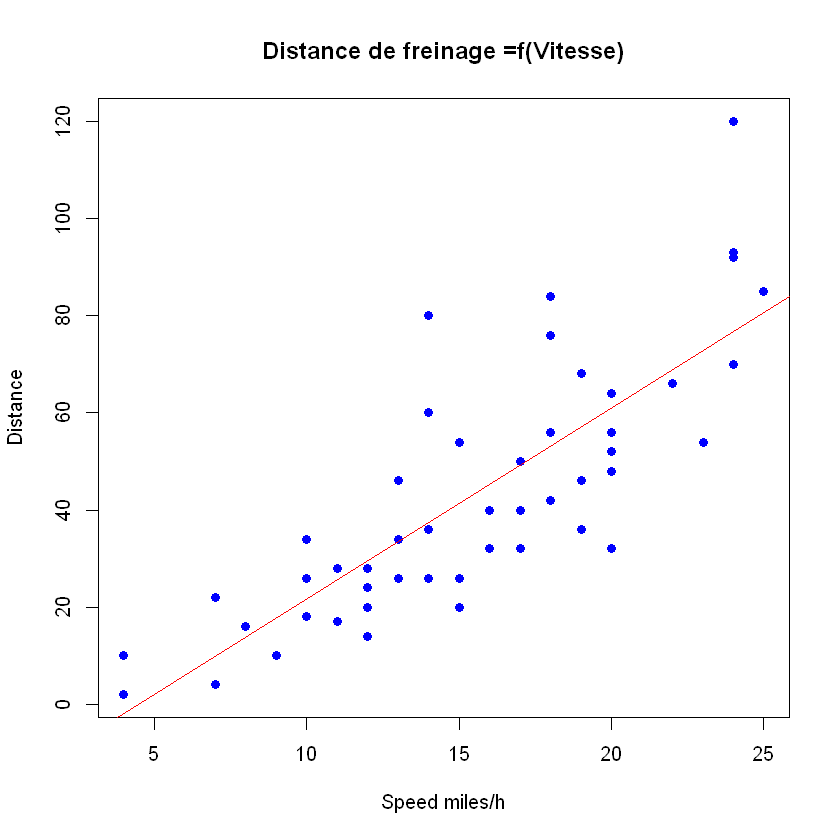

In [10]:
plot(x, y, main="Distance de freinage =f(Vitesse)", ylab="Distance", xlab="Speed miles/h", pch=16, col='blue')
abline(res.reg, col='red')

## Partie 2 
Calculer la somme des carrés des résidus, notée SSR,  ou le résidu correspondant à l’observation i est donné par :
  ei=yi-(b+axi),  c’est-à-dire écart entre la valeur observée (yi) et la valeur correspondante sur la droite de régréssion (b+axi)).
Proposer un graphe mettant en évidence les écarts entre valeurs de y observées et valeurs de y prédites par la droite de régréssion.
Calculer le coefficient R2 permettant d’estimer la qualité de l’ajustement. (rappel :
R2=(Var(Y)-SSR/n)/Var(Y)),  que pensez-vous de ce résultat ?
Quelles sont les informations que l’on retrouve en faisant summary(l) ?


In [11]:
a <- res.reg$coefficients[2]
b <- res.reg$coefficients[1]
e <- y - (a * x + b)

SSR <- function(z){ 
    return(sum(z^2))
}
SSR(e)

[1] 11353.52

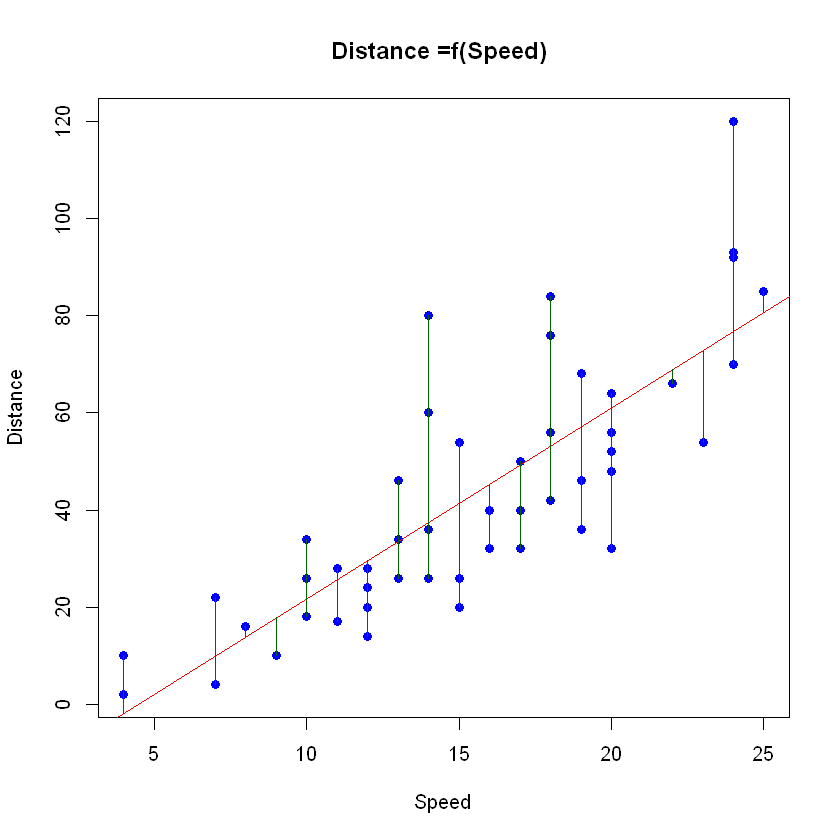

In [12]:
plot(x, y, main="Distance =f(Speed) ", ylab="Distance", xlab="Speed", pch=16, col='blue')
abline(res.reg, col="red");
segments(x, y, x, a * x + b, col="Darkgreen")


In [51]:
R2 <- cov(x,y)^2/(var(x)*var(y))
R2

summary(res.reg)
# le coefficient de R2 est proche de 1, donc il y'a une corrélation entre la vitesse et la distance parcouru par la voiture.

[1] 0.6510794


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
x             3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## Partie 3 
On a supposé que les erreurs sont distribuées normalement, faites une vérification graphique en traçant un histogramme des résidus, une boite à moustache, un diagramme quantile-quantile. Commenter.
On a supposé que la variance des résidus est constante. Donner un graphe (xi, ei) qui permet de vérifier cette hypothèse.


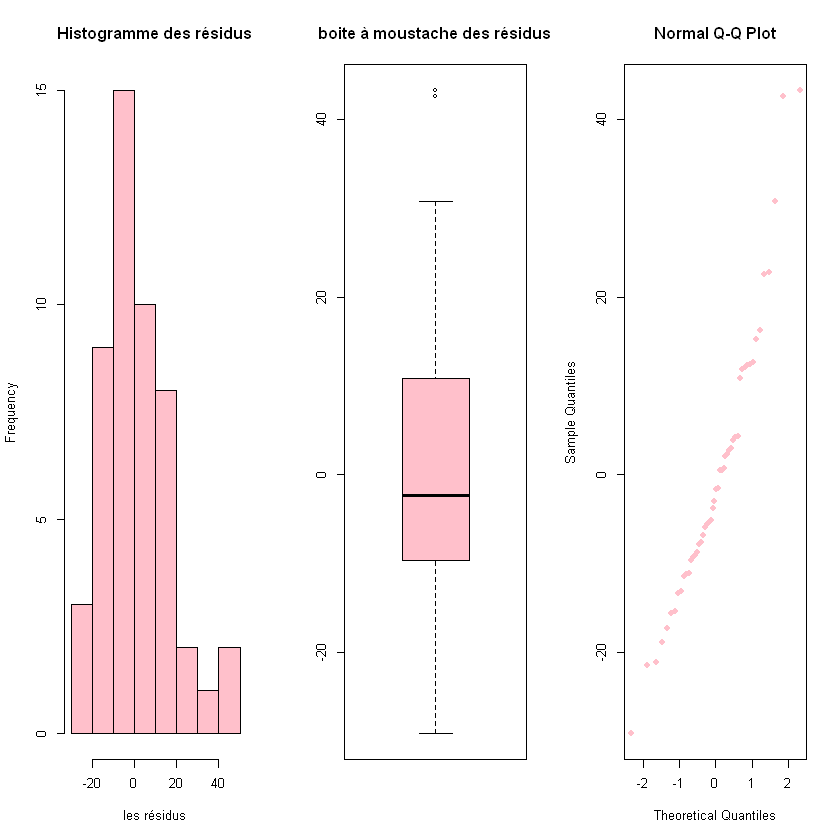

In [29]:
par(mfrow=c(1,3))
hist(e, main="Histogramme des résidus", xlab="les résidus", col='pink', freq=TRUE)
boxplot(e, col='pink', main="boite à moustache des résidus")
qqnorm(e, pch=16, col="pink")

***à partir des ces résultats on peut confirmer que la distribution des résidus suive une loi normale***

## Partie 4
Peut-être est-il plus raisonnable de chercher une relation de liaison entre x et y qui ne soit pas linéaire: Faire quelques essais, en traçant quelques nuages (x,y,ln(x),ln(y), x^2,y^2,sqrt(x),sqrt(y)…) et en calculant la valeur de R2 obtenue dans chaque cas. On étudiera le modèle qui semble le plus prometteur intégralement.

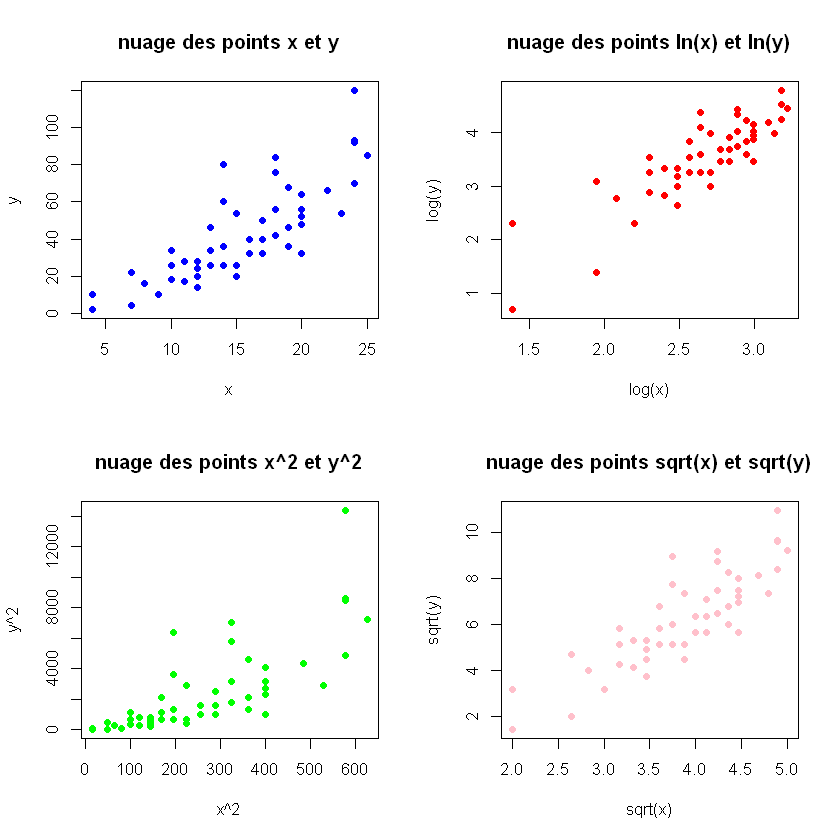

In [49]:
par(mfrow=c(2, 2))
plot(x, y, pch=16, col='blue', main="nuage des points x et y")
plot(log(x), log(y), pch=16, col='red', main="nuage des points ln(x) et ln(y)")
plot(x^2, y^2, pch=16, col='green', main="nuage des points x^2 et y^2")
plot(sqrt(x), sqrt(y), pch=16, col='pink', main="nuage des points sqrt(x) et sqrt(y)")

In [47]:
R2.xy <- cov(x,y)^2/(var(x)*var(y)); R2.xy
R2.lnxlny <- cov(log(x),log(y))^2/(var(log(x))*var(log(y))); R2.lnxlny
R2.x2y2 <- cov(x^2,y^2)^2/(var(x^2)*var(y^2)); R2.x2y2
R2.sqrtxsqrty <- cov(sqrt(x),sqrt(y))^2/(var(sqrt(x))*var(sqrt(y))); R2.sqrtxsqrty

[1] 0.6510794

[1] 0.7331444

[1] 0.5540726

[1] 0.7053388

Donc à partir des résultats des R2 obtenus on remarque que le R2 correspond à ln(x) et ln(y) est le meilleur. Donc le modèle qui semble le plus promoteur intégralement est celui de ln(x) et ln(y).


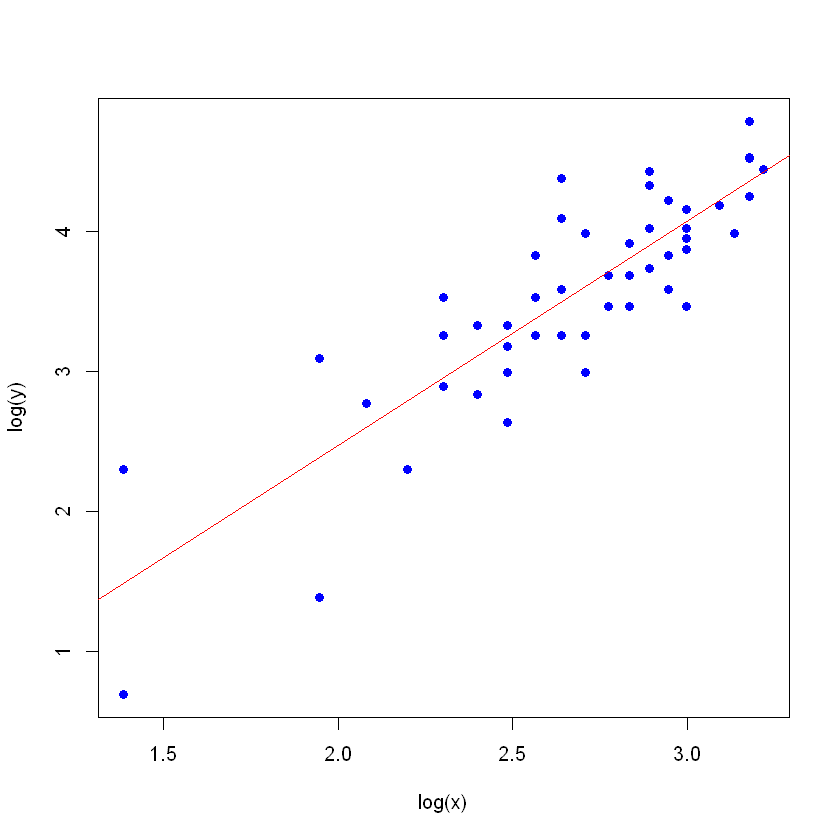

In [55]:
reg <- lm(log(y) ~ log(x))
plot(log(y) ~ log(x), col='blue', pch=16)
abline(reg, col='red')